# El cambio climático en la mira

## Autores
* Julián Corvalán
* Alejandro Mora
* Matias Lisousky

## Introducción

El sitio web de la base de datos estadísticos corporativos de la Organización para la
Agricultura y la Alimentación ( FAOSTAT ) difunde estadísticas del cambio de temperatura
superficial promedio por país, con actualizaciones anuales. La difusión actual cubre el
período 1961-2019. Las estadísticas están disponibles para las anomalías de temperatura
media mensual, estacional y anual, es decir, el cambio de temperatura con respecto a una
climatología de referencia, correspondiente al período 1951-1980. También está disponible
la desviación estándar del cambio de temperatura de la metodología de referencia. Los
datos se basan en los datos GISTEMP disponibles públicamente, los datos de cambio de
temperatura de la superficie global distribuidos por el Instituto Goddard de Estudios
Espaciales de la Administración Nacional de Aeronáutica y del Espacio (NASA-GISS).

## Objetivos

El cambio climático es uno de los temas importantes que enfrenta el mundo en esta era tecnológica. La mejor prueba de esta situación es el histórico cambio de temperatura. Se busca, entonces:

* Analizar los valores que se poseen teniendo en cuenta el factor del tiempo (años) y el agrupamiento por continentes.
* Poder analizar y predecir los cambios de temperatura que se esperarían
en los próximos años.

## Preguntas a responder - Alcance y puntos de interés
* ¿En cuanto han cambiado las temperaturas?
* ¿O hay alteraciones particulares en cada continente/zona?
* Si se indentifica alguna anomalía a través de los años, llamando anomalía como un cambio brusco de temperatura, ¿cuando se ha manifestado? ¿Fue global o zonal el alcance?
* ¿El cambio de temperatura es correlativo a través de los años?

El alcance de nuestro estudio es entonces analizar los valores de las lecturas de los cambios de temperatura globales a través de técnicas, métodos y conceptos de la Ciencia de Datos.

## Público de interés

El proyecto evolucionó hacia una línea más informativa y un storytelling orientado a la distribución de información para público con conocimientos básicos de matemática y estadística.

## Data Acquisition <a class="anchor" id="DataAcquisition"></a>

En primera instancia vamos a cargar los datos con los que vamos a trabajar y luego hacer una previsualización de los mismos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import plotly.express as px
from   scipy import stats
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = 'https://raw.githubusercontent.com/jcorvalan93/CH_DataScience/main/Environment_Temperature_change.csv'
df = pd.read_csv(url, sep=',', encoding='cp1252')
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


Como se puede observar tenemos inicialmente un tabla comprendida por el país o zona de estudio, mes de lectura, tipo de lectura, y las lecturas por año (entre otras columnas).

In [3]:
len(df.Area.unique())

284

Se puede observar que tenemos unas 284 areas en total, las cuales se componen en paises y regiones.

## EDA (Exploratory Data Analysis) <a class="anchor" id="EDA"></a>

A partir de la carga de datos, realizamos un tratamiento previo que nos ayudará luego a generar eficientemente visualizaciones.

In [4]:
temp_df = df.copy()

### Feature Selection <a class="anchor" id="FeatureSelection"></a>

In [5]:
df_object_columns = temp_df.iloc[:, 0:6]
df_object_columns.keys()

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code',
       'Element'],
      dtype='object')

Los datos de estas columnas no serán objeto de estudio ya que reprensentan valores de objetos. Es decir, en estas carecterísticas (features) tenemos información de los países/áreas que comprenden el estudio, mes de la medición de la temperatura y el tipo de medición, más los codigos de cada una.

In [6]:
df_year_columns = temp_df.iloc[:, 7:]
df_year_columns.keys()

Index(['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968',
       'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976',
       'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
       'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992',
       'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016',
       'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

Luego tenemos las mediciones de temperaturas de cada año como feature. En el dataset son nuestras **variables objetivos**. Es decir, en todas ellas se centrará nuestro estudio (se intentará predecir los valores de años posteriores) con lo cual no buscamos reducir su dimensionalidad. **<u>Es entonces que no se aplicarán métodos de Feature Selection.</u>**

### Instance Selection <a class="anchor" id="InstanceSelection"></a>

En el dataset, sobre la columna Element se tienen dos valores posibles: Temperature Change y Standard Deviation. Cuando apliquemos un algoritmo de regresión, lo haremos para los valores del primero, con lo cual, necesitamos filtrar las instancias de Element=Standard Deviation.

* Primero, verificamos los valores de Element:

In [7]:
element_values = temp_df['Element'].unique()
print(element_values)

['Temperature change' 'Standard Deviation']


* Segundo, aplicamos **Instance Selection** en nuestro dataset:

In [8]:
#Renombro las columnas para cambiar su estilo de escritura
temp_df = temp_df.rename(columns = {'Area Code':'area_code', 'Area':'area', 'Months Code':'months_code','Months':'months','Element Code':'element_code','Element':'element','Unit':'unit'})
#Elimino los element=Standard Deviation
temp_df.drop(temp_df[temp_df.element_code == 6078].index , inplace = True)

temp_df.head()

,area_code,area,months_code,months,element_code,element,unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


### Modelado de datos auxiliares <a class="anchor" id="DatosAuxiliares"></a>

En esta sección realizamos un procesamiento previo a los datos y crear nuevas estructuras que nos servirán luego para las visualizaciones y análisis.

* Creamos un listado con los meses del año.
* Filtramos columnas que no utilizaremos
* Agrupamos valores por continentes
* Obtenemos el promedio de cambio de temperatura por año

In [9]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp_months = temp_df[temp_df['months'].isin(months)]

temp_year = temp_df[(temp_df["months"]=="Meteorological year")]
temp_year = temp_year.drop(["area_code","months_code","months","element","element_code","unit"],axis=1)
temp_year = temp_year.T
temp_year.columns = temp_year.loc['area']
temp_year.drop('area', inplace = True)

Continents = temp_year[["Africa","Asia","Europe","Northern America","South America","Oceania","Antarctica"]] 
Continents = Continents.rename(columns={"Northern America":"N_America","South America":"S_America"})
Continents.reset_index(level=0, inplace=True)
Continents = Continents.rename(columns={"index":"Year"})
idx = Continents.columns[1:].tolist()

In [10]:
def preprocess_inputs(_df):
    _df = _df.groupby('area')\
            .mean()\
            .loc[:, 'Y1961':]
    
    # promedio/media de temperatura global
    _df = pd.DataFrame(_df.mean()).reset_index(drop=False)
    
    #renombro columnas y cambio el tipo de dato de la columna año
    #esto ultimo se hace para que me pueda tomar como una serie de tiempo y no como elementos por separado
    _df.columns=['year', 'temperature_change']
    _df['year'] = _df['year'].apply(lambda x: x[1:]).astype(int)
    
    return _df

In [11]:
time_series = preprocess_inputs(temp_df)
time_series.head()

,year,temperature_change
0,1961,0.143032
1,1962,-0.028398
2,1963,-0.026297
3,1964,-0.122865
4,1965,-0.224154


## Análisis estadístico de time_series <a class="anchor" id="analisis_univariado"></a>

Dado que en las próximas secciones utilizaremos este set de datos para realizar visualizaciones y analisis de ciencia de datos, necesitamos previamente estudiar la calidad de estas lecturas, teniendo en cuenta su distribución y las medidas de tendencia central.

Entonces, en esta sección, haremos un breve análisis estadístico univariado, con el objetivo de analizar las lecturas de las mediciones por año con una mirada estadística de tipo descriptivo. En resultado, nos agrega valor en nuestra exploración de los datos.

In [12]:
import scipy 
scipy.stats.describe(time_series['temperature_change'])

DescribeResult(nobs=59, minmax=(-0.22415409663865546, 1.4648986274368048), mean=0.4700899661775744, variance=0.22498114569237165, skewness=0.38775568372912556, kurtosis=-0.9810871140299633)

Resultados obtenidos:



*   **nobs**

Representa el número de observaciones. El periodo de tiempo de la mediciones es de 59 años (1961-2019).

*   **minmax**

Valor mínimo y máximo de los promedios anuales de las mediciones.

*   **mean**

Promedio o media de los promedios anuales de las mediciones.

*   **variance**

La varianza es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. En este caso es la varianza de los promedios anuales de las mediciones.

*   **skewness**

Refiere a la medida de asimetría de los datos.

La asimetría se refiere a la distorsión de simetría. 
Una distribución, o conjunto de datos, es simétrico si se ve igual a la izquierda y a la derecha del punto central.
Son medidas de tercer momento y nos permiten entender si es que la distribución de valores numéricos es normal o no.

>Dado que hemos obtenido una asimetría de **0.38** podemos decir **los promedios anuales de las mediciones se consideran muy similares a una distribución normal**.

*   **kurtosis**

Es una medida del grado de cuántos valores atípicos hay. Para una distribución normal, el valor del estadístico de curtosis es 0. Una curtosis positiva indica que los datos muestran más valores atípico extremos que una distribución normal. La curtosis negativa indica que los datos presentan valores atípicos menos extremados que una distribución normal.

>Dado que hemos obtenido un valor de curtosis de **-0.98**, podemos afirmar que **los promedios anuales de las mediciones presentan una curtosis negativa**, lo que significa que tiene un pico más plano y colas más delgadas en comparación con una distribución normal.


In [13]:
from IPython.display import Image
from IPython.core.display import HTML

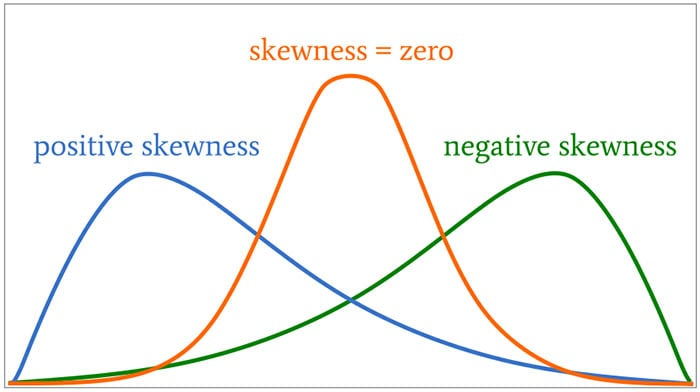

In [14]:
url= "https://www.allaboutcircuits.com/uploads/articles/understanding-the-normal-distribution-parametric-tests-skewness-and-kurtosis-rk-aac-image2.jpg"
Image(url, width=450, height=300)

In [15]:
Image(url= "https://community.sw.siemens.com/servlet/rtaImage?eid=ka64O000000kDup&feoid=00N4O000006Yxpf&refid=0EM4O00000113Pw")

### Medidas de dispersión


In [16]:
print("Coef. Variación: ", scipy.stats.variation(time_series['temperature_change']))

Coef. Variación:  1.0004147158822905


In [17]:
print("IQR: ", scipy.stats.iqr(time_series['temperature_change']))

IQR:  0.7894107767772274


In [18]:
print("Error estándar: ", scipy.stats.sem(time_series['temperature_change']))

Error estándar:  0.06175143526670312


Resultados obtenidos:

* **Coeficiente de Variación**

Refiere a la relación entre el tamaño de la media y la variabilidad de la variable.

>Al tener como resultado un valor de este coeficiente mayor a uno, podemos observar una alta variabilidad de las mediciones de los promedios anuales de las lecturas.

* **IQR - rango intercuartílico**

El rango intercuartílico es una medida de variabilidad adecuada cuando la medida de posición central empleada ha sido la mediana. Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: RQ = Q3 - Q1. A la mitad del rango intercuartil se le conoce como desviación cuartil (DQ), es afectada muy poco por cuentas extremas. Esto lo hace una buena medida de dispersión para distribuciones sesgadas: DQ = RQ/2= (Q3 - Q1)/2

>Teniendo en cuenta que nuestros valores mínimos y máximos son [-0.22, 1.46] respectivamente, podemos observar una variabilidad alta entre cuartiles, teniendo en cuenta que la media de las mediciones es de 0.47.

* **Error estandar**

Representa a la desviación estandar. Es el valor que cuantifica cuánto se apartan los valores de la media de la población. Es decir, el error estándar de la media cuantifica las oscilaciones de la media muestral  (media obtenida en base a los datos medidos en la muestra utilizada) alrededor de la media poblacional (verdadero valor de la media). Es una medida del error que se comete al tomar la media calculada en una muestra como estimación de la media de la población total.

>Según el resultado obtenido, observamos un error medio bajo en las mediciones del promedios anuales.

### Medidas de asimetría y kurtosis

Estas medidas informan sobre dos aspectos importantes de la forma de la distribución: su grado de asimetría y su grado de homogeneidad. Al ser medidas de forma, no dependen de las unidades de medida de los datos

In [19]:
print("Skewness: ", scipy.stats.skew(time_series['temperature_change']))

Skewness:  0.38775568372912556


In [20]:
print("Kurtosis: ", scipy.stats.kurtosis(time_series['temperature_change']))

Kurtosis:  -0.9810871140299633


Resultados obtenidos:

* **Skewness**

Presenta una asimetría positiva.

* **Kurtosis**

Presenta una kurtosis negativa.

### Verificación de los datos y la curva normal

Sabiendo los valores de skewness y kurtosis, queremos evaluar si nuestras lecturas de los promedios anuales coinciden con una curva normal.

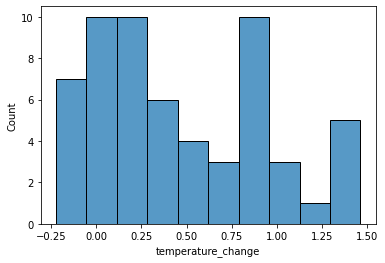

In [21]:
sns.histplot(time_series['temperature_change'], bins=10, kde=False)

>En este histograma podemos observar que confirma la asimetría positiva observada anteriormente.

In [22]:
stats.shapiro(time_series['temperature_change'])

ShapiroResult(statistic=0.9409127831459045, pvalue=0.006501821335405111)

La prueba Shapiro-Wilk formula como hipótesis nula que los datos siguen una distribución normal. El valor resultante luego se analiza para aceptar o no esta hipótesis.

Si pvalue > 0.05 --> indica no rechazar la hipotesis nula.

>Es entonces que podemos indicar gracias a la prueba shapiro, que nuestra variable no cumple estadisticamente con una curva normal.

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([-0.2241541 , -0.2109072 , -0.17764935, -0.16784126, -0.13197513,
         -0.1288408 , -0.12286501, -0.04993604, -

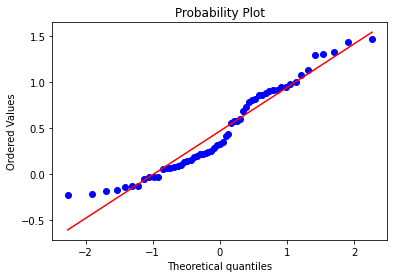

In [23]:
import pandas_profiling
stats.probplot(time_series.temperature_change, dist = 'norm', plot=plt)

Un gráfico Cuantil-Cuantil permite observar cuan cerca está la distribución de un conjunto de datos a alguna distribución ideal.

>Entonces, el grafico Q-Q nos indica que la variable se acerca visualmente a una curva normal. Pero como ya vimos en el analisis anterior, con el test de shapiro, esta variable estadísticamente no se acerca a una curva normal.

## Data Wrangling <a class="anchor" id="DW"></a>

Previo a visualizar y analizar nuestros datos, debemos llevarlos a un proceso de limpieza y corrección con el objetivo de disminuir el riesgo a errores y fallos en su manipulación, así como también poder facilitar el acceso y el análisis de ellos.

### Manejo de datos faltantes <a class="anchor" id="DatosFaltantes"></a>

En primera instancia debemos verificar la cantidad de valores nulos que tenemos en cada una de las columnas del dataset.

In [24]:
df.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

* Como se puede observar, las columnas que contienen valores nulos son las que representan los años.

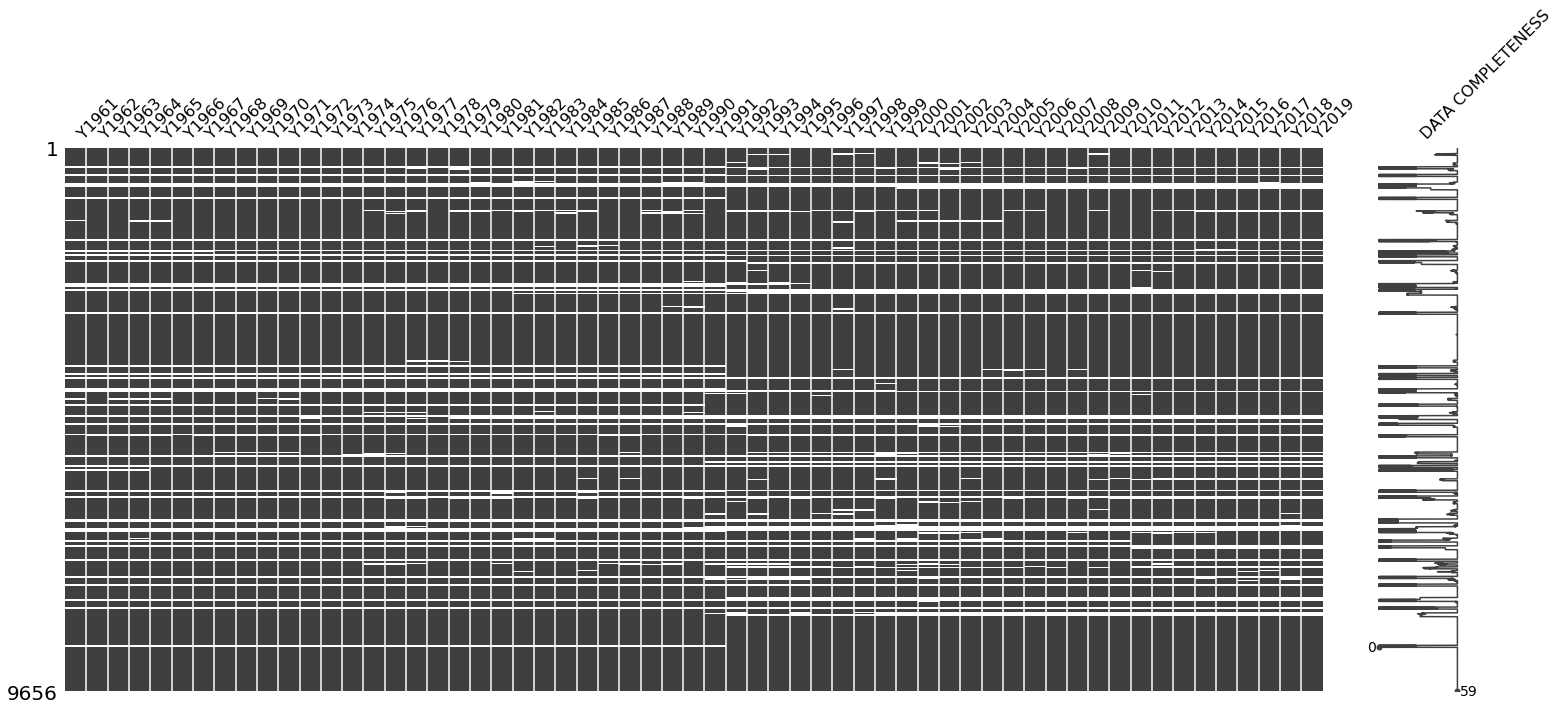

In [25]:
soloYears = df.iloc[:, 7:]
msno.matrix(soloYears, labels=True)

* Usamos la libreria Missigno para explorar y entender de qué forma están compuestos los nulos. Como las columnas son los cambios de temperatura a través de los años, se pasaran a rellenar estos vacios con 0 (antes que null es preferible tener como que no hubo cambios de temperatura ese año)

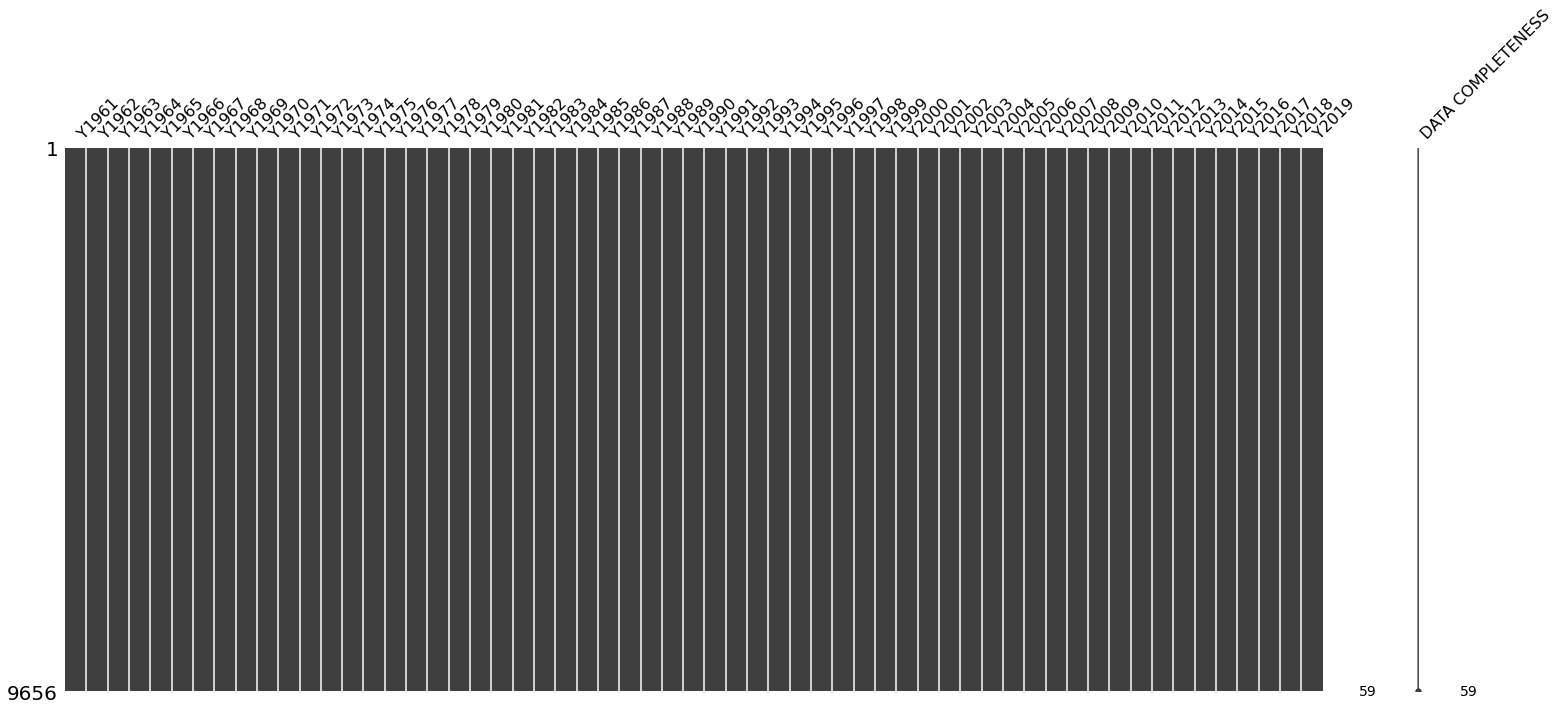

In [26]:
df.replace(np.nan, 0, inplace = True)
soloYears = df.iloc[:, 7:]
msno.matrix(soloYears, labels=True)

### Corrección del formato de los datos <a class="anchor" id="CorreccionFormatoDatos"></a>

En esta sección buscamos verificar y realizar correcciones en los formatos de las columnas del dataset. Ésto es básicamente para intentar prevenir cualquier error de tipo de datos que podamos tener a futuro.

Verificamos primero las columnas de las lecturas por año:

In [27]:
soloYears.dtypes

Y1961    float64
Y1962    float64
Y1963    float64
Y1964    float64
Y1965    float64
Y1966    float64
Y1967    float64
Y1968    float64
Y1969    float64
Y1970    float64
Y1971    float64
Y1972    float64
Y1973    float64
Y1974    float64
Y1975    float64
Y1976    float64
Y1977    float64
Y1978    float64
Y1979    float64
Y1980    float64
Y1981    float64
Y1982    float64
Y1983    float64
Y1984    float64
Y1985    float64
Y1986    float64
Y1987    float64
Y1988    float64
Y1989    float64
Y1990    float64
Y1991    float64
Y1992    float64
Y1993    float64
Y1994    float64
Y1995    float64
Y1996    float64
Y1997    float64
Y1998    float64
Y1999    float64
Y2000    float64
Y2001    float64
Y2002    float64
Y2003    float64
Y2004    float64
Y2005    float64
Y2006    float64
Y2007    float64
Y2008    float64
Y2009    float64
Y2010    float64
Y2011    float64
Y2012    float64
Y2013    float64
Y2014    float64
Y2015    float64
Y2016    float64
Y2017    float64
Y2018    float64
Y2019    float

* Se puede observar que todas las columnas de años se encuentran con el formato correcto.

Luego el resto de las columnas:

In [28]:
sinYears = df.iloc[:, 0:7]
sinYears.dtypes

Area Code        int64
Area            object
Months Code      int64
Months          object
Element Code     int64
Element         object
Unit            object
dtype: object

Para las columnas cuyo tipo es object, las cambiamos a tipo string (conjunto de caracteres)

In [29]:
df[['Area']] = df[['Area']].astype('str')
df[['Months']] = df[['Months']].astype('str')
df[['Element']] = df[['Element']].astype('str')
df[['Unit']] = df[['Unit']].astype('str')
df.dtypes

Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
                 ...   
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
Y2019           float64
Length: 66, dtype: object

* Aparentemente no es necesario/no lo hace convertir de tipo object a string. El resto de las columnas tiene bien el tipo

### Normalizacion de datos <a class="anchor" id="NormalizacionDatos"></a>

* Los datos ya se encuentran nornalizados.

### Bins - contenedores <a class="anchor" id="Bins"></a>

* No fue posible de aplicar, la varianza de los datos ya es pequeña.

### Variables Dummy <a class="anchor" id="Dummy"></a>

* Los datos solo indican cambios de temperatura, no existen otras categorias para reemplazar.

## Visualizaciones de los datos <a class="anchor" id="graficos"></a>

### Cambio de temperatura global por decada <a class="anchor" id="grafico_1"></a>
En este primer grafico analizamos las lecturas de los cambios de temperatura por decada, a través de los meses.

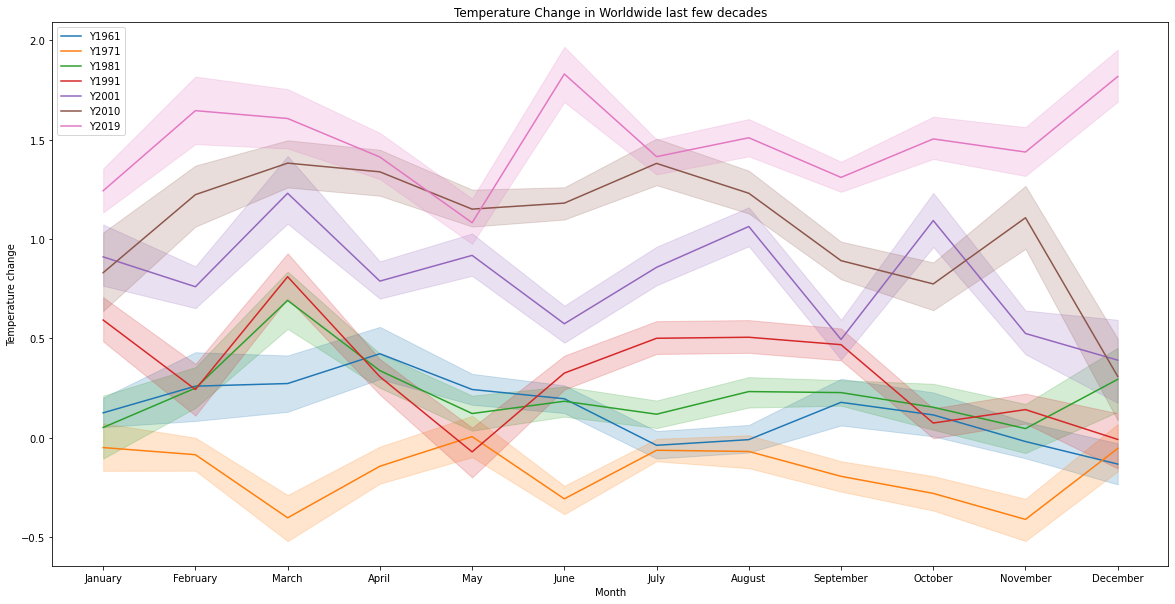

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1961.loc[temp_months.element=='Temperature change'], label='Y1961')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1971.loc[temp_months.element=='Temperature change'], label='Y1971')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1981.loc[temp_months.element=='Temperature change'], label='Y1981')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1991.loc[temp_months.element=='Temperature change'], label='Y1991')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2001.loc[temp_months.element=='Temperature change'], label='Y2001')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2010.loc[temp_months.element=='Temperature change'], label='Y2010')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2019.loc[temp_months.element=='Temperature change'], label='Y2019')
plt.xlabel('Month')
plt.ylabel('Temperature change')
plt.title('Temperature Change in Worldwide last few decades')
plt.show()

Se observa que el cambio de temperaturas fue en aumento en las últimas 4 décadas.

Además, durante el mes de diciembre en las últimas dos décadas, se observa la mayor diferencia de lecturas en un mismo periodo.

### Cambio de temperatura global por continente <a class="anchor" id="grafico_2"></a>

En este segundo gráfico analizamos las lecturas de los cambios de temperatura por continente, a través de los años.

In [31]:
fig = px.line(Continents, x=Continents.Year, y=Continents.columns[1:],
              title='Temperature in °C over countries', width=1500)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(186)]},
                           {"title": "Temperature in °C over continents",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(186)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(Continents.columns[1:])])
            )])

fig.show()

Se observa una pendiente positiva sobre el grafico de lineas de cambios de temperaturas, confirmando el gráfico anterior, y por otro lado, verificando el aumento de temperaturas, principalmente en las últimas décadas, teniendo la minoría de mediciones por debajo del cero.

### Verificación de amplitud de lecturas <a class="anchor" id="grafico_3"></a>

En este tercer gráfico representamos las densidades de los valores de las lecturas de los cambios de temperatura por continente, buscando observar los rangos númericos de estos valores.

Con ello, cuanto más extendido verticalmente se observa el objeto en el gráfico, nos puede comunicar la amplitud de las lecturas.

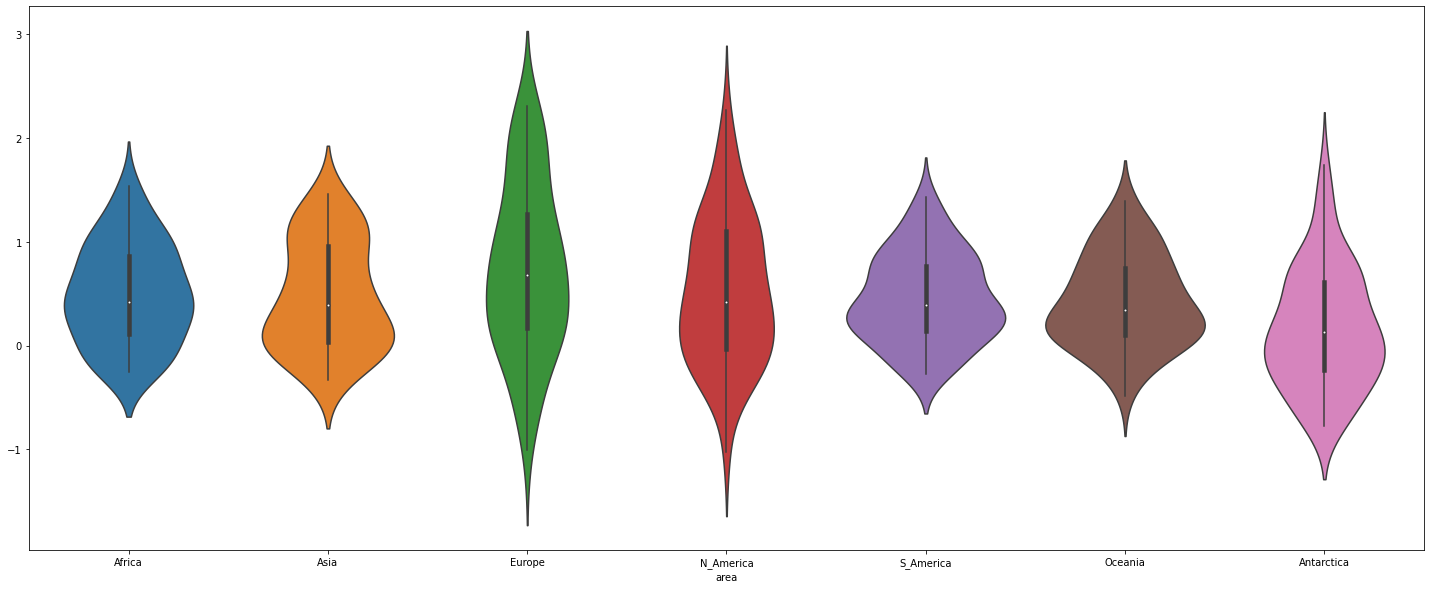

In [32]:
fig, ax = plt.subplots(figsize =(25, 10)) 
sns.violinplot(ax = ax, data = Continents.iloc[:,0:])

Como podemos observar, cambios extremos se han dado en Europa y America del Norte.

### Promedio de lecturas a través de los años <a class="anchor" id="grafico_4"></a>

En este cuarto gráfico representamos los promedio de los valores de las lecturas de los cambios de temperatura (globales) en una serie de tiempo.

Con ello, queremos visualizar y entender cómo es la tendencia de las lecturas.

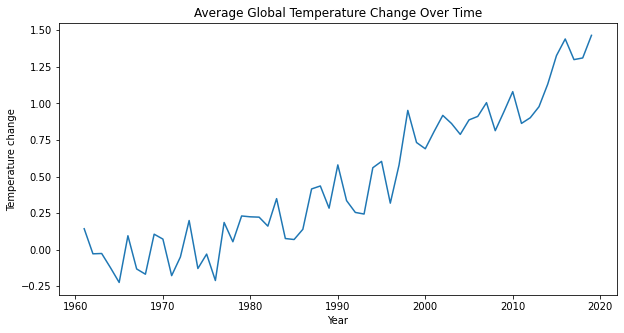

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x=time_series.year,y=time_series.temperature_change)
plt.xlabel('Year')
plt.ylabel('Temperature change')
plt.title('Average Global Temperature Change Over Time')
plt.show()

Tal y como hemos visto en el segundo gráfico, se observa un aumento de las temperaturas en el transcurso del tiempo, siendo las últimas tres décadas las más significativas.

### Relación entre lecturas y años <a class="anchor" id="grafico_5"></a>

En este quinto gráfico representamos la relación de los promedios de los valores de las lecturas de los cambios de temperatura (globales) y una serie de tiempo.

Con ello, queremos visualizar y verificar la distribución de las lecturas a través del tiempo.

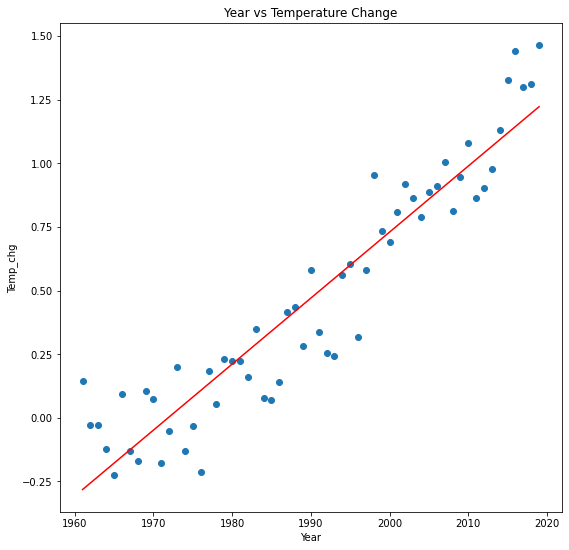

In [34]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(time_series.year, time_series.temperature_change)
ax.set_title('Year vs Temperature Change')
ax.set_xlabel('Year')
ax.set_ylabel('Temp_chg')
m, b = np.polyfit(time_series.year, time_series.temperature_change, deg=1)
#ecuacion de la recta -> y=mx+b
tendency_line = m*time_series.year + b
plt.plot(time_series.year, tendency_line, color='red')


En este gráfico podemos reforzar lo observado en los gráficos 1, 2 y 4 en el cual nos muestra una pendiente ascendente de los valores de las lecturas con respecto a los años. 

Además no se observan puntos muy alejados de la linea de tendencia (recta en rojo) que se ha marcado. Esto nos puede indicar que muy posiblemente no hayan valores anormales, o que por lo menos no han se tienen lecturas extremas con respecto a la media.

### Verificación de outliers <a class="anchor" id="grafico_6"></a>

En este sexto gráfico intentamos identificar los valores atípicos. Es decir, poder observar las lecturas que sean numericamente distantes del resto de los datos. Estos valores pueden afectar potencialmente a los próximos análisis que haremos.

Text(0.5, 1.0, 'Temperature change distribution')

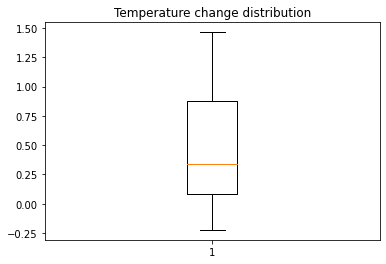

In [35]:
fig2, ax2 = plt.subplots()
ax2.boxplot(time_series.temperature_change)
ax2.set_title("Temperature change distribution")

Utilizando el dataframe de time_series no se observan outliers sobre los valores de temperature_change.

Además refuerza lo observado en el gráfico anterior.

## ¿El cambio de temperatura es correlativo a través de los años? <a class="anchor" id="ML_tittle"></a>

### ML - Regresión lineal <a class="anchor" id="ML_rl"></a>

Entonces, en las visualizaciones podemos observar: 
+ La dispersión de datos (scatterplot) se observa una leve correlación entre el año y el cambio de temperatura.
+ La tendencia (la pendiente) es positiva, es decir que los cambios de temperaturas tienden a aumentar a través de los años.

Dado que con observar gráficos no es suficiente, ya que posee un factor subjetivo, procedemos a realizar un analisis estadístico utilizando regresión lineal en un modelo de Machine Learning, diseñado a partir de dos hipotesis que se desprenden de aquella observación:

**Hipotesis nula** : `Ho = el cambio de temperatura es correlativo con los años.`

**Hipotesis alternativa**: `Hi = el cambio de temperatura y los años son variables independientes.`

In [36]:
time_series.temperature_change.describe()

count    59.000000
mean      0.470090
std       0.474322
min      -0.224154
25%       0.085562
50%       0.335127
75%       0.874973
max       1.464899
Name: temperature_change, dtype: float64

### OLS - Ordinary Least Squares / Mínimos Cuadrados Ordinarios <a class="anchor" id="ML_ols"></a>

Aplicaremos este algoritmo de regresión, definiendo nuestro modelo a partir de las hipotesis generadas:

_"La temperatura es correlacional al año"_

Entonces en este modelo suponemos que:

`temperature_change: variable dependiente`

`year: variable independiente`

In [37]:
model1 = 'temperature_change~year'

lm1 = sm.ols(formula = model1, data = time_series).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:     temperature_change   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     423.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.72e-28
Time:                        23:20:28   Log-Likelihood:                 23.654
No. Observations:                  59   AIC:                            -43.31
Df Residuals:                      57   BIC:                            -39.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.1203      2.508    -20.381      0.0

**Observaciones OLS**

+ coef != 0 y p_value < 0.05  => me indica rechazar la hipotesis nula
+ prob JB > 0.05 => me indica no rechazar la hipotesis nula
+ DW en [0;4] => me indica que las variables son independientes => rechazo la hipotesis nula

### Entrenamiento con la totalidad de los datos y predicciones futuras <a class="anchor" id="total_train"></a>

A partir de nuestro modelo creado, procedemos a realizar en primera instancia un entrenamiento de nuestro dataset, con la particularidad que utilizaremos la totalidad de nuestros datos y luego, como datos de prueba, se utilizan datos (años) futuros.

Con ello buscamos verificar la calidad de nuestros datos y poder realizar predicciones con valores que no poseemos aún.

In [38]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = time_series[["year"]]
df_x = np.array(dataX)
df_y = time_series['temperature_change'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(df_x, df_y)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
pred = regr.predict(df_x)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(df_y, pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(df_y, pred))

Coefficients: 
 [0.02592483]
Independent term: 
 -51.12031976321558
Mean squared error: 0.03
Variance score: 0.88


**Observaciones de la regresion lineal**

+ De la ecuación de la recta y = mx + b nuestra pendiente “m” es el coeficiente 0.025 y el término independiente “b” es -51.12
+ Tenemos un Error Cuadrático relativamente bajo 0.03
+ El puntaje de Varianza es 0.88 con lo cual es cercano a 1.0

**Predicción en regresión lineal**

Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir el valor de cambio de temperatura para la decada 2019-2029.

In [39]:
from operator import itemgetter

future_predictions = []
years = range(2020, 2030)

for y in years:
    prediction = regr.predict([[y]])
    future_predictions.append(itemgetter(0)(prediction))
    print(f"Year: {y} | temperature_change: {itemgetter(0)(prediction)}")

Year: 2020 | temperature_change: 1.2478348364699343
Year: 2021 | temperature_change: 1.2737596654796803
Year: 2022 | temperature_change: 1.2996844944894264
Year: 2023 | temperature_change: 1.3256093234991724
Year: 2024 | temperature_change: 1.3515341525089113
Year: 2025 | temperature_change: 1.3774589815186573
Year: 2026 | temperature_change: 1.4033838105284033
Year: 2027 | temperature_change: 1.4293086395381494
Year: 2028 | temperature_change: 1.4552334685478954
Year: 2029 | temperature_change: 1.4811582975576414


In [40]:
last_decade = time_series.tail(10).copy()
last_decade

,year,temperature_change
49,2010,1.080097
50,2011,0.863045
51,2012,0.901637
52,2013,0.977131
53,2014,1.131417
54,2015,1.326462
55,2016,1.440185
56,2017,1.299112
57,2018,1.310459
58,2019,1.464899


In [41]:
last_decade.temperature_change.describe()

count    10.000000
mean      1.179444
std       0.219333
min       0.863045
25%       1.002873
50%       1.215265
75%       1.322462
max       1.464899
Name: temperature_change, dtype: float64

In [42]:
mean_pred = np.mean(future_predictions, axis=None)
min_pred = np.min(future_predictions)
max_pred = np.max(future_predictions)

print(f"Mean: {mean_pred} | min: {min_pred} | max: {max_pred}")

Mean: 1.3644965670137872 | min: 1.2478348364699343 | max: 1.4811582975576414


**Analizando las predicciones**

Entre el 2010 y el 2019, la media de los cambios de temperatura fue de 1.179444, con minimo de 0.863045 y un maximo de 1.464899. Mientras que la predicción arrojó resultados como 1.3644965, 1.2478348, 1.4811582 respectivamente.

A simple vista, los valores no parecen "irreales", o por lo menos mantienen la coherencia que expusimos en el EDA (tendencia de aumento de temperatura).

### Entrenamiento con particiones de datos <a class="anchor" id="split_train"></a>

En el modelo anterior, los datos de prueba fueron valores que no estaban en nuestro rango (utilizamos años futuros). Luego hicimos un entrenamiento sobre todos los datos y una predicción sobre estos datos futuros.

Entonces, esta vez, vamos a crear nuevamente un modelo distinto, realizando una división del dataframe entre los datos de entrenamiento y de prueba (20% del total).

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separo las muestras para la validación
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=2)


# crear el modelo, se ajusta y se realiza una predicción a partir de las muestras 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(y_pred)

[ 0.91460123  0.46345921  0.6226858   1.17997889  0.30423261  0.96767676
  0.43692144 -0.30613602  0.48999697 -0.27959825  1.12690336  1.1003656 ]


### Métricas del modelo <a class="anchor" id="metrics"></a>


##### > <u>Error Cuadrático Medio (MSE)</u>

MSE mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.

Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.

In [44]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.04453966298145321


##### > <u>Raiz del Error Cuadrático Medio (RMSE)</u>

RMSE es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

In [45]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.21104422044077212


In [46]:
print("RMSE (log)",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (log) -1.555687591915275


##### > <u>Error Absoluto Medio (MAE)</u>

En MAE, el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre 10 y 0 será el doble de la diferencia entre 5 y 0.

In [47]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.17677074341098067


##### > <u>R-Cuadrado (R2)</u>

R-cuadrado indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente.

R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta.

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2",r2)

R2 0.8024775718896223


##### Analisis de las métricas

Para este nuevo modelo generado, nos encontramos que:
+ Teniendo en cuenta el valor de **MSE** nos podría indicar que los valores de la pendiente y del interceptor es cercano al real, el cual minimiza el error cuadrático. Es decir, la ecuación de la recta formada por el modelo es similar a la ecuación real.
+ Teniendo en cuenta el valor de **MAE**, el cual indica el promedio de la diferencia absoluta entre la predicción del modelo y el valor objetivo. Nos da idea de la sensibilidad de las medidas por lo poco dispersas que resultaron. El error absoluto nos indica el grado de aproximación y da un indicio de la calidad de la medida.
+ Finalmente teniendo en cuenta el valor de **R2**, el cual se acerca a 1, se puede decir que se tiene, en el modelo, una buena precisión sobre las predicciones realizadas.

(!) Luego, en la siguiente sección se podrá ver visualmente estas "distancias" (diferencias) entre la predicción y los valores reales.

### Underfitting & Overfitting <a class="anchor" id="anyfitting"></a>

Las principales causas al obtener malos resultados en Machine Learning son el Overfitting o el Underfitting de los datos. Cuando entrenamos nuestro modelo intentamos “hacer encajar” -fit en inglés- los datos de entrada entre ellos y con la salida. Tal vez se pueda traducir overfitting como “sobreajuste” y underfitting como “subajuste” y hacen referencia al fallo de nuestro modelo al generalizar -encajar- el conocimiento que pretendemos que adquieran.

Habiendo entendido ambos conceptos, procedemos a analizar visualmente el comportamiento del modelo anteriormente generado:

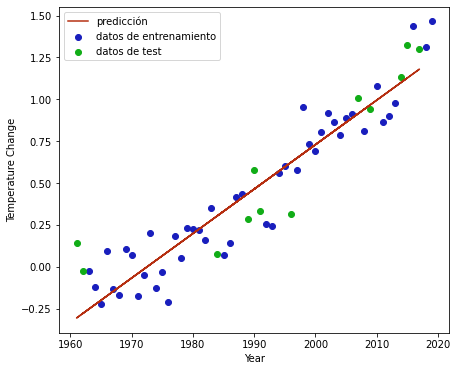

In [49]:
plt.figure(figsize=(7, 6))
ax = plt.axes()
ax.scatter(X_train,y_train, c='#191ebd', label='datos de entrenamiento')
ax.scatter(X_test,y_test, c='#11ad17', label='datos de test')
ax.plot(X_test, y_pred, c='#b52e10', label='predicción')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change')
ax.legend()

plt.show()

Por lo pronto, no se observan indicios de Overfitting ni Underfitting; las distancias entre la recta de predicción y los puntos de dispersión de los datos de entrenamiento y prueba no presentan muchas (Underfitting) ni pocas (Overfitting) diferencias.

### Cross-Validation <a class="anchor" id="cross_val"></a>

Cross-Validation es una técnica utilizada para evaluar un modelo de Machine Learning y probar su rendimiento. Para ello vamos a utilizar la función cross_val_score, utilizando como scoring las métricas analizadas anteriormente para aplicarlas en las estimaciones.

+ Primero analizamos la precisión del modelo utilizando la función score de la biblioteca de sklearn

In [50]:
from sklearn.model_selection import cross_val_score

score = lr.score(X_train,y_train)
print("Métrica del modelo", score)

Métrica del modelo 0.8977638143470237


> Teniendo en cuenta que el mejor valor posible es "1", entonces podemos decir que tenemos una buena precisión sobre el modelo creado y entrenado.

Luego ejecutamos para cada métrica la función de cross-validation. Lo vamos a realizar puntualmente con dos divisiones (cross-validation splitting strategy).

> Cross-validation splitting strategy
El valor de este parámetro es clave para este estudio ya que indica la cantidad de divisiones o pliegues que se realizarán sobre los datos de entrenamiento, así como también la cantidad de iteraciones que se evaluará el modelo por cada pliegue.

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

Viendo entonces, la imagen anterior, lo que se realizará es un proceso de entrenamiento y testing para cada pliegue con el fin de analizar la calidad de nuestra muestra de entrenamiento. Esto nos asegurará la generalidad de los datos de la muestra, o dicho de otra forma, que poseemos un dataset uniforme.

#### Número de Folds = 2

In [132]:
R2_scores_2 = cross_val_score(lr, df_x, df_y, cv=2, scoring="r2")
 
print("Metricas cross_validation", R2_scores_2)
print("Media de las métricas para R2", R2_scores_2.mean())

Metricas cross_validation [-2.32663756 -0.27401248]
Media de las métricas para R2 -1.3003250191966018


In [53]:
MAE_scores_2 = cross_val_score(lr, df_x, df_y, cv=2, scoring="neg_mean_absolute_error")
 
print("Métricas cross_validation", MAE_scores_2)
print("Media de las métricas para MAE",MAE_scores_2.mean())

Métricas cross_validation [-0.29827893 -0.32457559]
Media de las métricas para MAE -0.3114272592783017


In [54]:
MSE_scores_2 = cross_val_score(lr, df_x, df_y, cv=2, scoring="neg_mean_squared_error")
 
print("Métricas cross_validation", MSE_scores_2)
print("Media de las métricas para MSE", MSE_scores_2.mean())

Métricas cross_validation [-0.1318604  -0.13632648]
Media de las métricas para MSE -0.13409344213841554


In [136]:
RMSE_scores_2 = cross_val_score(lr, df_x, df_y, cv=2, scoring="neg_root_mean_squared_error")
 
print("Métricas cross_validation", RMSE_scores_2)
print("Media de las métricas para RMSE", RMSE_scores_2.mean())

Métricas cross_validation [-0.36312587 -0.36922416]
Media de las métricas para RMSE -0.3661750194286371


#### Número de Folds = 5

In [134]:
#Incremento el número de folds para analizar la precisión
R2_scores_5 = cross_val_score(lr, df_x, df_y, cv=5, scoring="r2")
 
print("Metricas cross_validation", R2_scores_5)
print("Media de las métricas para R2", R2_scores_5.mean())

Metricas cross_validation [-5.58112469 -0.0360469  -0.75931045  0.06372474 -0.10388367]
Media de las métricas para R2 -1.2833281927144329


In [57]:
MAE_scores_5 = cross_val_score(lr, df_x, df_y, cv=5, scoring="neg_mean_absolute_error")
 
print("Métricas cross_validation", MAE_scores_5)
print("Media de las métricas para MAE",MAE_scores_5.mean())

Métricas cross_validation [-0.25603767 -0.12394074 -0.17601866 -0.08620858 -0.18098071]
Media de las métricas para MAE -0.16463727116313434


In [133]:
MSE_scores_5 = cross_val_score(lr, df_x, df_y, cv=5, scoring="neg_mean_squared_error")
 
print("Métricas cross_validation", MSE_scores_5)
print("Media de las métricas para MSE", MSE_scores_5.mean())

Métricas cross_validation [-0.09346108 -0.02567795 -0.04716755 -0.01239222 -0.04850901]
Media de las métricas para MSE -0.045441561697026775


In [137]:
RMSE_scores_5 = cross_val_score(lr, df_x, df_y, cv=5, scoring="neg_root_mean_squared_error")
 
print("Métricas cross_validation", RMSE_scores_5)
print("Media de las métricas para RMSE", RMSE_scores_5.mean())

Métricas cross_validation [-0.30571405 -0.16024341 -0.21718091 -0.11132035 -0.2202476 ]
Media de las métricas para RMSE -0.20294126565938822


#### Número de Folds = 10

In [135]:
R2_scores_10 = cross_val_score(lr, df_x, df_y, cv=10, scoring="r2")
 
print("Metricas cross_validation", R2_scores_10)
print("Media de las métricas para R2", R2_scores_5.mean())

Metricas cross_validation [ -6.05756262  -0.03850588  -0.50795594  -0.87949902   0.062175
  -1.70581641  -0.12254428  -0.02907692  -0.31021239 -16.25174189]
Media de las métricas para R2 -1.2833281927144329


In [61]:
MAE_scores_10 = cross_val_score(lr, df_x, df_y, cv=10, scoring="neg_mean_absolute_error")
 
print("Métricas cross_validation", MAE_scores_10)
print("Media de las métricas para MAE",MAE_scores_10.mean())

Métricas cross_validation [-0.29314283 -0.09659725 -0.16243319 -0.0789434  -0.13481048 -0.19585501
 -0.10409282 -0.06227556 -0.09338788 -0.28199274]
Media de las métricas para MAE -0.1503531155789343


In [62]:
MSE_scores_10 = cross_val_score(lr, df_x, df_y, cv=10, scoring="neg_mean_squared_error")
 
print("Métricas cross_validation", MSE_scores_10)
print("Media de las métricas para MSE", MSE_scores_10.mean())

Métricas cross_validation [-0.10806722 -0.01309608 -0.03475515 -0.01265055 -0.02915234 -0.0551819
 -0.01873704 -0.00511151 -0.01179735 -0.08412482]
Media de las métricas para MSE -0.03726739639996565


In [138]:
RMSE_scores_10 = cross_val_score(lr, df_x, df_y, cv=10, scoring="neg_root_mean_squared_error")
 
print("Métricas cross_validation", RMSE_scores_10)
print("Media de las métricas para RMSE", RMSE_scores_10.mean())

Métricas cross_validation [-0.32873579 -0.11443809 -0.18642734 -0.11247467 -0.17074055 -0.23490827
 -0.13688331 -0.07149484 -0.10861562 -0.2900428 ]
Media de las métricas para RMSE -0.1754761277041788


#### Utilizando KFold de sklearn para definir el ***splitting strategy***

In [64]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model, tree, ensemble

# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(df_x, df_y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 47, Test set:12
Fold:2, Train set: 47, Test set:12
Fold:3, Train set: 47, Test set:12
Fold:4, Train set: 47, Test set:12
Fold:5, Train set: 48, Test set:11


In [65]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

##### Linear Regression

In [66]:
score = cross_val_score(linear_model.LinearRegression(), df_x, df_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.03911143 -0.02611951 -0.02937565 -0.0308905  -0.01584862]
rmse= 0.17


##### Decision Tree Regressor

In [67]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), df_x, df_y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.02490359 -0.03306355 -0.01721447 -0.03922427 -0.02176817]
rmse= 0.17


##### Random Forest Regressor

In [68]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), df_x, df_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-0.02348575 -0.02175096 -0.0138917  -0.02842909 -0.01824069]
rmse= 0.15


#### Mejora del modelo utilizando KFold

##### Decision Tree Regressor Tuning

In [69]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), df_x, df_y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.24
For max depth: 2
rmse= 0.17
For max depth: 3
rmse= 0.15
For max depth: 4
rmse= 0.16
For max depth: 5
rmse= 0.16
For max depth: 6
rmse= 0.16
For max depth: 7
rmse= 0.16
For max depth: 8
rmse= 0.16
For max depth: 9
rmse= 0.16
For max depth: 10
rmse= 0.17


##### Random Forest Regressor Tuning

In [70]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), df_x, df_y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 0.15
For estimators: 100
rmse= 0.15
For estimators: 150
rmse= 0.14
For estimators: 200
rmse= 0.14
For estimators: 250
rmse= 0.14
For estimators: 300
rmse= 0.14
For estimators: 350
rmse= 0.14


## Agregando CO2 como variable de nuestro modelo

Continuando con nuestro estudio, buscamos factores externos que expliquen este ascenso de temperatura. Uno de ellos es la huella de carbono, la cual representa las emisiones de gases de efecto invernadero procedentes de la actividad humana. Cada vez que viajamos en coche, cargamos el teléfono móvil o ponemos una lavadora, entre otras miles de rutinas, dejamos atrás una estela de gases que se acumulan en la atmósfera y sobrecalientan el planeta.

Para ello volvemos a recurrir a la regresion, puntualmente a la regresión lineal múltiple.

In [71]:
url = 'https://raw.githubusercontent.com/jcorvalan93/CH_DataScience/main/CO2_anual.csv'
co2 = pd.read_csv(url, sep=',', encoding='cp1252')
co2.head()

,y,Emissions in billion metric tons
0,1961,9.42
1,1962,9.75
2,1963,10.27
3,1964,10.83
4,1965,11.32


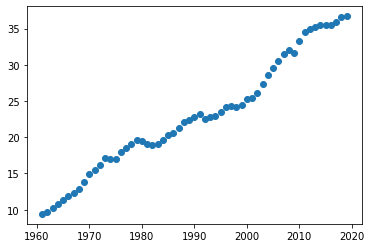

In [72]:
plt.scatter(co2.y, co2['Emissions in billion metric tons'])

In [73]:
co2[['y', 'Emissions in billion metric tons']].corr()

,y,Emissions in billion metric tons
y,1.000000,0.987105
Emissions in billion metric tons,0.987105,1.000000


In [74]:
co2[['y', 'Emissions in billion metric tons']].corr(method='spearman')

,y,Emissions in billion metric tons
y,1.000000,0.997195
Emissions in billion metric tons,0.997195,1.000000


In [75]:
time_series2 = pd.concat([time_series, co2['Emissions in billion metric tons']], axis=1)
time_series3 = time_series2.copy()
time_series2.head()

,year,temperature_change,Emissions in billion metric tons
0,1961,0.143032,9.42
1,1962,-0.028398,9.75
2,1963,-0.026297,10.27
3,1964,-0.122865,10.83
4,1965,-0.224154,11.32


In [76]:
time_series2[['temperature_change', 'Emissions in billion metric tons']].corr()

,temperature_change,Emissions in billion metric tons
temperature_change,1.000000,0.926206
Emissions in billion metric tons,0.926206,1.000000


> Agregamos a este nuevo dataframe una columna target con una formula matematica, de modo que represente un modelo de regresión.

In [77]:
from sklearn.preprocessing import StandardScaler

time_series2.rename(columns={'temperature_change':'tmp_chg', 'Emissions in billion metric tons':'co2'}, inplace=True)
num = ['year', 'tmp_chg', 'co2']
time_series2[num] = StandardScaler().fit_transform(time_series2[num])

time_series2['target'] = 2*time_series2['tmp_chg'] + 3*time_series2['co2'] + (time_series2['year']/(2*time_series2['tmp_chg']**2 + 3*time_series2['co2']**2))
time_series2.head()

,year,tmp_chg,co2,target
0,-1.702939,-0.695447,-1.729446,-6.750551
1,-1.644217,-1.059969,-1.687310,-7.334278
2,-1.585495,-1.055503,-1.620913,-7.130567
3,-1.526773,-1.260842,-1.549410,-7.316980
4,-1.468051,-1.476220,-1.486844,-7.546545


In [78]:
time_series2[['year', 'target']].corr()

,year,target
year,1.000000,0.985783
target,0.985783,1.000000


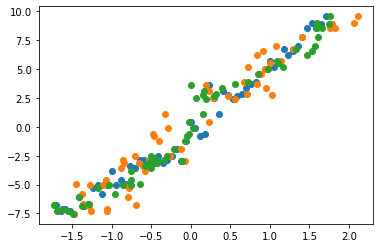

In [79]:
plt.scatter(time_series2.year, time_series2.target)
plt.scatter(time_series2.tmp_chg, time_series2.target)
plt.scatter(time_series2.co2, time_series2.target)

In [80]:
from sklearn.model_selection import train_test_split

X = time_series2.drop('target', axis=1)
y = time_series2.target

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                  test_size=.2, random_state= 0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

ols = LinearRegression()

ols.fit(X_train, y_train)

y_pred = ols.predict(X_test)

print('r2', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('coef', ols.coef_)
print('intercept', ols.intercept_)

r2 0.9831464293497925
mse 0.3111053023625074
coef [2.39914445 1.83298091 0.96383414]
intercept 0.0769388670785135


Se puede observar que de las 3 variables, la de menor peso es de CO2, pero con muy poca diferncia con respecto al resto.
Por otro lado, observamos una precisión muy alta, lo cual nos podría indicar indicios de Overfitting en el modelo propuesto.
En cuanto al error, se observa un valor mucho mayor al modelo planteado anteriormente para la regresión lineal simple.

In [81]:
y_pred_train = ols.predict(X_train)

print('r2', r2_score(y_train, y_pred_train))
print('mse', mean_squared_error(y_train, y_pred_train))
#print('coef', ols.coef_)
#print('intercept', ols.intercept_)

r2 0.9867731989669964
mse 0.36938809275972495


> Utilizando los datos de entrenamiento, en lugar de los datos de test, se observan unos valores de precisión y error medio muy similares.

In [82]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso = Lasso(alpha=.5)

lasso.fit(X_train, y_train)

y_predl = lasso.predict(X_test)

print('r2', r2_score(y_test, y_predl))
print('mse', mean_squared_error(y_test, y_predl))
print('coef', lasso.coef_)
print('intercept', lasso.intercept_)

r2 0.9742122676053047
mse 0.4760237726713621
coef [2.23711878 1.60134401 0.86692747]
intercept 0.10966330003732899


Utilizando Lasso como modelo de regresión, y en comparación con los valores anteriores (OLS) se puede observar:


*   Una menor precisión del modelo
*   Un error medio mayor
*   Coeficientes similares pero con menor peso. CO2 continua siendo el de menor peso entre las variables.

In [83]:
y_pred_trainl = lasso.predict(X_train)

print('r2', r2_score(y_train, y_pred_trainl))
print('mse', mean_squared_error(y_train, y_pred_trainl))
#print('coef', ols.coef_)
#print('intercept', ols.intercept_)

r2 0.97799329080899
mse 0.61458672552052


> Utilizando los datos de entrenamiento para predecir, se observa un ínfimo incremento de la precisión. Sin embargo, tenemos un aumento considerable de el error medio.

In [84]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge(alpha=50)

ridge.fit(X_train, y_train)

y_predr = ridge.predict(X_test)

print('r2', r2_score(y_test, y_predr))
print('mse', mean_squared_error(y_test, y_predr))
print('coef', ridge.coef_)
print('intercept', ridge.intercept_)

r2 0.9063872228527186
mse 1.728027368434261
coef [1.29238003 1.28257958 1.27892605]
intercept 0.15794471715441266


Utilizando Ridge como modelo de regresión, y en comparación con los valores anteriores (OLS y Lasso) se puede observar:

*   Una menor precisión del modelo
*   Un error medio mucho mayor (>x3)
*   Coeficientes muy similares. Ya no se podría tener una distinción significativa de pesos entre las variables.

In [85]:
y_pred_trainr = ridge.predict(X_train)

print('r2', r2_score(y_train, y_pred_trainr))
print('mse', mean_squared_error(y_train, y_pred_trainr))
#print('coef', ols.coef_)
#print('intercept', ols.intercept_)

r2 0.9207462176777692
mse 2.213339674722194


> Al igual que Lasso, utilizando los datos de entrenamiento para predecir, se observa un ínfimo incremento de la precisión. Sin embargo, tenemos un aumento considerable de el error medio.

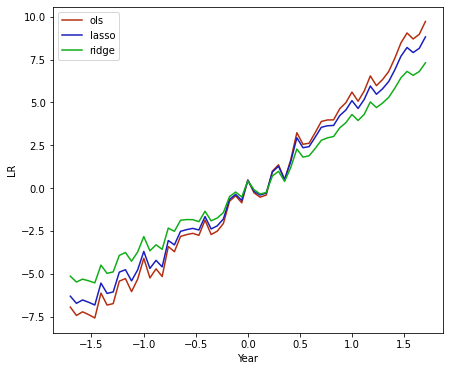

In [86]:
#['year', 'tmp_chg', 'co2']

time_series2['ols'] = ols.coef_[0]*time_series2['year'] + ols.coef_[1]*time_series2['tmp_chg'] + ols.coef_[2]*time_series2['co2'] + ols.intercept_
time_series2['lasso'] = lasso.coef_[0]*time_series2['year'] + lasso.coef_[1]*time_series2['tmp_chg'] + lasso.coef_[2]*time_series2['co2'] + lasso.intercept_
time_series2['ridge'] = ridge.coef_[0]*time_series2['year'] + ridge.coef_[1]*time_series2['tmp_chg'] + ridge.coef_[2]*time_series2['co2'] + ridge.intercept_

plt.figure(figsize=(7, 6))
ax = plt.axes()
ax.plot(time_series2['year'], time_series2['ols'], c='#b52e10', label='ols')
ax.plot(time_series2['year'], time_series2['lasso'], c='#191ebd', label='lasso')
ax.plot(time_series2['year'], time_series2['ridge'], c='#11ad17', label='ridge')

ax.set_xlabel('Year')
ax.set_ylabel('LR')
ax.legend()

plt.show()

#### Algoritmos de Clasificación

Para aplicar los algoritmos de clasificación usaremos una copia de nuestro Dataframe "time_series" con las variables year, Temperature_change y Emissions in billion metric tons.

In [87]:
time_series3.rename(columns={'temperature_change':'temp_chg', 'Emissions in billion metric tons':'co2'}, inplace=True)
time_series3.head()

,year,temp_chg,co2
0,1961,0.143032,9.42
1,1962,-0.028398,9.75
2,1963,-0.026297,10.27
3,1964,-0.122865,10.83
4,1965,-0.224154,11.32


Creamos nuestra variable categórica 'target', donde compararemos la temperatura de un año con respecto al anterior.
Se le asignará 0 si la temperatura baja o 1 si la temperatura subió respecto al año anterior. Esta variable será utilizada para nuestros modelos de clasificación.

In [88]:
for i in range(1,len(time_series3)):
    if time_series3.loc[i,'temp_chg']>time_series3.loc[i-1,'temp_chg']:
         time_series3.loc[i,'target']=1
    else:
        time_series3.loc[i,'target']=0
time_series3.replace(np.nan, 0, inplace = True)       
time_series3.target = time_series3.target.astype(int)
time_series3.head()

,year,temp_chg,co2,target
0,1961,0.143032,9.42,0
1,1962,-0.028398,9.75,0
2,1963,-0.026297,10.27,1
3,1964,-0.122865,10.83,0
4,1965,-0.224154,11.32,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



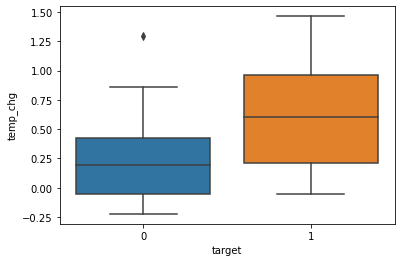

In [89]:
sns.boxplot(time_series3.target, time_series3.temp_chg)

In [90]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Realizaremos una prueba T sobre los 2 grupos para analizar sus medias.

In [91]:
import pingouin as pg
x = time_series3[time_series3['target']==1].temp_chg
y = time_series3[time_series3['target']==0].temp_chg
pg.ttest(x,y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.542546,56.930811,two-sided,0.000799,"[0.17, 0.62]",0.91704,37.417,0.932879


El p valor nos indica que debemos rechazar la hipótesis nula y aceptar la hipótesis alternativa de nuestra prueba t. Por lo tanto podemos decir, que nuestras medias para los grupos 0 y 1 son estadísticamente diferentes.

In [92]:
pip install pypair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Verificaremos la correlación de nuestras variables

In [93]:
from pypair.association import binary_continuous
binary_continuous(time_series3.target, time_series3.temp_chg, measure='point_biserial')

0.4187141257552787

Gracias a la prueba t y a la correlación de las variables. Podemos indicar que la variable temp_chg nos servirá para predecir la variable target

Dividiremos nuestro Dataframe para poder entrenar nuestro modelo

In [94]:
from sklearn.model_selection import train_test_split

X = time_series3[['temp_chg']]
y = time_series3.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

X_train

,temp_chg
10,-0.177649
51,0.901637
26,0.415012
55,1.440185
30,0.335127
41,0.917838
48,0.943937
27,0.435257
46,1.004826
57,1.310459


Escalaremos nuestros valores

In [95]:
from sklearn.preprocessing import StandardScaler

scalerx = StandardScaler().fit(X_train)
scalerx.mean_, scalerx.var_

(array([0.45326631]), array([0.24813429]))

In [96]:
X_train_scaled = scalerx.transform(X_train)
X_test_scaled = scalerx.transform(X_test)
X_train_scaled

array([[-1.26656628],
       [ 0.90010639],
       [-0.07679569],
       [ 1.98124329],
       [-0.23716593],
       [ 0.93263033],
       [ 0.98502406],
       [-0.03615442],
       [ 1.10725955],
       [ 1.7208189 ],
       [-0.39910514],
       [-1.16858288],
       [-0.20982489],
       [ 0.82263268],
       [-0.42122473],
       [-0.80155661],
       [ 1.75294541],
       [ 0.21397157],
       [-0.75725315],
       [-1.35992478],
       [-0.97095838],
       [ 0.25312103],
       [-0.34073827],
       [ 1.36139135],
       [ 0.82090656],
       [-0.44760828],
       [ 2.03085682],
       [-0.46394989],
       [-0.63080131],
       [-1.17487506],
       [ 0.91865594],
       [-1.24687648],
       [ 1.69803993],
       [-0.96694275],
       [-0.53709206],
       [-0.62279782],
       [-1.33333157],
       [-0.71908177],
       [-1.01018119],
       [-0.765015  ],
       [-0.69775245],
       [-0.51014223],
       [ 0.67171717],
       [ 1.000978  ]])

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6666666666666666
[[4 4]
 [1 6]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.60      0.86      0.71         7

    accuracy                           0.67        15
   macro avg       0.70      0.68      0.66        15
weighted avg       0.71      0.67      0.66        15



Analizaremos los resultados de las métricas de nuestro modelo:

El accuracy no es índica que nuestro modelo pudo predecir correctamente el %66 de las muestras.

La matriz de confusión nos muestra que el modelo predijo 4 VP y 6 VN, si esto lo dividimos por el total de la muestra(15), el resultado es (4+6)/15= 0.6666666666666666. El resultado refuerza lo indicado por el accuracy.

f1-score nos indica que se predijo mejor el grupo 1. Y el accuracy es de 0.67 índica que el modelo no es muy efectivo.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



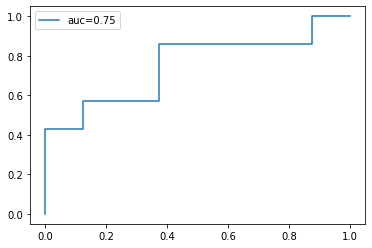

In [98]:
from sklearn import metrics
y_pred_prob = logr.predict_proba(X_test)[:,1]

fpr, tpr, l = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label= 'auc='+str(auc))
plt.legend()

Notamos en nuestra prueba roc que el score es de 0.75 lo que significa que nuestra predicción es buena.

### K-nearest neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)
y_pred = knn3.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8
[[6 2]
 [1 6]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.75      0.86      0.80         7

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



Utilizando KNN como modelo de clasificación, y en comparación con los valores de Logistic regression se puede observar:


*   Una mayor accuracy
*   Una mayor predicción de nuestros VP y VN
*   f1-score nos indica una mejor predicción de los grupos y mejor acurracy.

Por lo que podemos indicar que el modelo es mejor que LR.

### Decision Tree Classifier

In [100]:
from sklearn import tree
from sklearn.tree import plot_tree

dtc = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
dtc.fit(X_train_scaled, y_train)
y_pred = dtc.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7333333333333333
[[5 3]
 [1 6]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.67      0.86      0.75         7

    accuracy                           0.73        15
   macro avg       0.75      0.74      0.73        15
weighted avg       0.76      0.73      0.73        15



Utilizando DTC como modelo de clasificación, y en comparación con los valores de los modelos anteriores podes indicar que:

*   Mayor accuracy que LR(0.66), pero mas bajo que KNN(0.8)
*   Una mayor predicción de nuestros VP y VN que LR, pero de nuevo, menor a KNN
*   f1-score nos indica una mejor predicción de los grupos y mejor acurracy que LR, pero menor que KNN

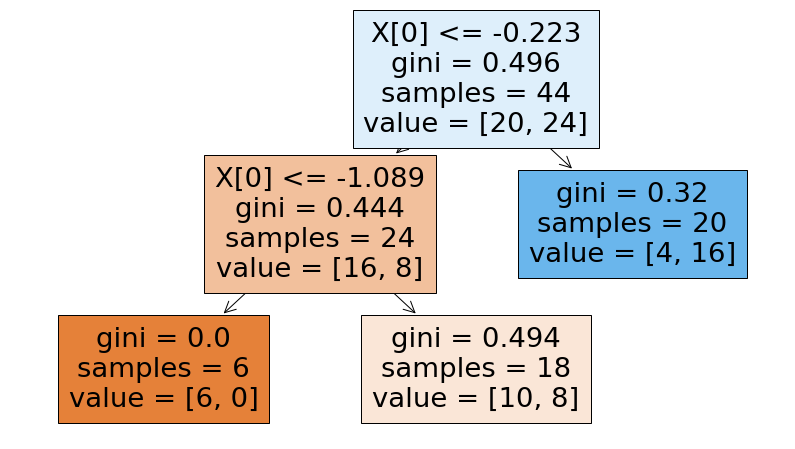

In [101]:
plt.figure(figsize=(14, 8))
plot_tree(decision_tree=dtc, filled=True);

### SVM

In [102]:
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clfsvm = svm.SVC()
clfsvm.fit(X_train_scaled, y_train)
y_predsvm = clfsvm.predict(X_test_scaled)

print(accuracy_score(y_test,y_predsvm))
print(confusion_matrix(y_test,y_predsvm))
print(classification_report(y_test,y_predsvm))

0.6
[[3 5]
 [1 6]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.55      0.86      0.67         7

    accuracy                           0.60        15
   macro avg       0.65      0.62      0.58        15
weighted avg       0.65      0.60      0.58        15



Por último, el modelo SVM nos da valores menores a todos los anteriores modelos.

### Conclusión

Para resumir, el modelo KNN fue el algoritmo que nos funcionó mejor en nuestro dataset, dándonos los mejores valores de los 4 modelos. Además, seleccionamos solo una variable numérica, ya que al agregar 1 o 2 variables los modelos bajan su precisión.

Para aclarar, seleccionamos estos modelos, ya que los modelos de MultinomialNB y LinearDiscriminantAnalysis es necesario tener 2 variables categóricas por lo que esto no aplica a nuestro Dataset.

### Algoritmos de Clustering

En esta sección utilizaremos los siguientes algoritmos no supervisados de Clustering:


*   K-Means
*   Agglomerative Clustering 
*   DBSCAN
*   Spectral Clustering

El objetivo de su aplicación es basicamente poder identificar posibles conjuntos o clusters a partir del analisis de dos features que seleccionamos.
Además, teniendo en cuenta lo estudiado hasta ahora, se intentará plantear y comprobar una hipotesis para el descubrimiento (o más bien comprobación) de estos subconjuntos.

Features con las que trabajaremos:


*   TmpChg: Mediciones de cambio de temperaturas
*   CO2Emission: Volumen de dióxido de carbono presente en el aire.
*   Target: Indica si ha aumentado la temperatura con respecto al año anterior.

**Hipotesis:** 

"Los valores de CO2 siguen el patrón del aumento o disminución de temperatura con respecto al año anterior"

In [103]:
by_world = df[df['Area Code'] == 5000]
by_world = by_world[by_world['Months Code'] == 7020]
by_world = by_world[by_world['Element Code'] == 7271]
by_world = by_world.fillna(0)
by_world = by_world.melt(id_vars=['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element','Unit'],var_name='Year', value_name='Temp Change')
by_world.drop(['Months Code','Element Code', 'Unit', 'Element', 'Area', 'Area Code', 'Months'], axis=1, inplace=True)
by_world['Year'] = by_world['Year'].str[1:].astype('str')

indicators = [by_world, co2]
gw = pd.concat(indicators, axis=1)
gw.rename(columns={'Temp Change':'TmpChg','Emissions in billion metric tons':'CO2Emission'}, inplace = True)
gw = gw.drop(['y'],axis=1)

gw = gw.astype({"Year": int})
gw['TempDifference'] = gw['TmpChg'].diff();
gw['Target'] = (gw['TempDifference'] > 0).astype(int) # 1:subio la temp. respecto al año anterior, 0:disminuyó o no cambio
gw.replace(np.nan, 0, inplace = True)

In [104]:
features = gw[['TmpChg', 'CO2Emission']].to_numpy()
print('Media de TmpChg:', np.mean(features[:,0]))
print('Media de CO2Emission:', np.mean(features[:,1]))

Media de TmpChg: 0.523542372881356
Media de CO2Emission: 22.964576271186445


> Primero debemos verificar los valores de las features que seleccionamos, para ello, obtenemos las medias de cada feature. Con ello, nos indica que debemos realizar una normalización.

In [105]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(features)
print('Media de TmpChg:', np.mean(data[:,0]))
print('Media de CO2Emission:', np.mean(data[:,1]))

Media de TmpChg: -6.39789539614497e-17
Media de CO2Emission: -5.419393747322798e-16



> Luego de haber realizado un escalado de los datos, verificamos la distribución de los mismos. Esto nos ayudará a poder visualizar las posibles clasificaciones, si existieran.

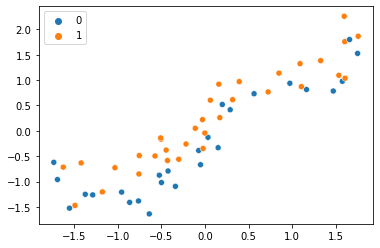

In [106]:
featTmp = data[:,0] #co2 emissions
featCO2 = data[:,1] #tmp chg
y = gw.iloc[:, 4].values #target

sns.scatterplot(x= featCO2, y = featTmp, hue=y)

### K-Means


Inertia: 32.714047196765634


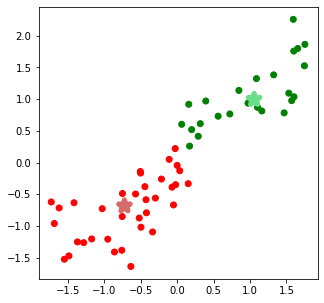

In [107]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state=0).fit(data)
labels = kmeans.predict(data)
colours=['green', 'red']
c_assingment = [colours[label] for label in labels]

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
colours_centroids=['#6ade89', '#d46d6a']
  
# Plotting the clustered scatter plot
plt.figure(figsize =(5, 5))
plt.scatter(featCO2, featTmp, c = c_assingment)
plt.scatter(centroids_x,centroids_y,marker = "*", s=150,linewidths = 5, zorder = 10, c=colours_centroids)
plt.show()

print("\nInertia:", kmeans.inertia_)

**Inertia** mide qué tan bien se han "clusterizado" los datos por el algoritmo. Éste se calcula por la sumatoria de las raices cuadradas de las distancias euclideas entre cada punto y su centroide.

Se puede considerar un modelo como "bueno" cuando el mismo tiene un valor bajo de inertia y un numero bajo de clusters "k".

Por otro lado, mientras que aumente K, inertia decrece.

Entonces, procedemos a realizar el **Método del codo** para poder encontrar el número óptimo de clusters.

In [108]:
inertia = []

for k in range(2,10):
  km = KMeans(n_clusters = k, random_state=0)
  km.fit(data)
  inertia.append(km.inertia_)
  print("k =",k, "Inertia =", km.inertia_)

k = 2 Inertia = 32.714047196765634
k = 3 Inertia = 18.162757518945668
k = 4 Inertia = 11.653668506018821
k = 5 Inertia = 8.990756788760727
k = 6 Inertia = 6.587710934462552
k = 7 Inertia = 5.298493949284618
k = 8 Inertia = 4.603320591992286
k = 9 Inertia = 3.9666895839659984


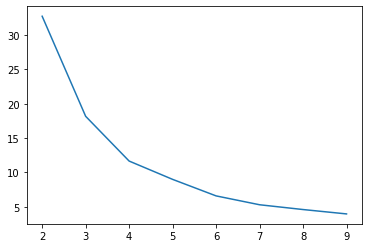

In [109]:
sns.lineplot(x= range(2,10) , y=inertia)

Teniendo en cuenta la curva, la misma comienza a disminuir la inercia a partir de un k = 4, es decir en 4 clusters.

Esto significa que, teniendo en cuenta las features seleccionadas, no son suficientes para explicar el aumento (o disminución) de temperaturas respecto al año anterior.

### K-Means con k=4


Inertia: 11.653668506018821


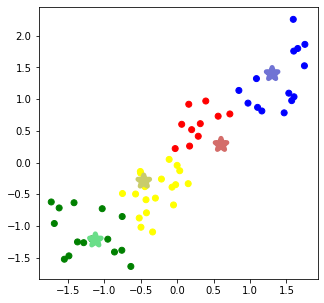

In [110]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(data)

labels = kmeans.predict(data)
colours=['green', 'red','blue', 'yellow']
c_assingment = [colours[label] for label in labels]

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
colours_centroids=['#6ade89', '#d46d6a','#7073d4', '#c9cc6c']
  
# Plotting the clustered scatter plot
plt.figure(figsize =(5, 5))
plt.scatter(featCO2, featTmp, c = c_assingment)
plt.scatter(centroids_x,centroids_y,marker = "*", s=150,linewidths = 5, zorder = 10, c=colours_centroids)
plt.show()

print("\nInertia:", kmeans.inertia_)

### K-Means - Analisis con silhouette_score

Silhouette se refiere a un método de interpretación y validación de consistencia dentro de grupos de datos. La técnica proporciona una representación gráfica sucinta de qué tan bien se ha clasificado cada objeto.

El valor de la silueta es una medida de cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación). La silueta varía de −1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio grupo y mal emparejado con los grupos vecinos. Si la mayoría de los objetos tienen un valor alto, la configuración de agrupación en clústeres es adecuada. Si muchos puntos tienen un valor bajo o negativo, es posible que la c

For n_clusters = 2 The average silhouette_score is : 0.5390921484284944
For n_clusters = 3 The average silhouette_score is : 0.48321609125526005
For n_clusters = 4 The average silhouette_score is : 0.43657305711672023
For n_clusters = 5 The average silhouette_score is : 0.449540014275586
For n_clusters = 6 The average silhouette_score is : 0.38026529334770715


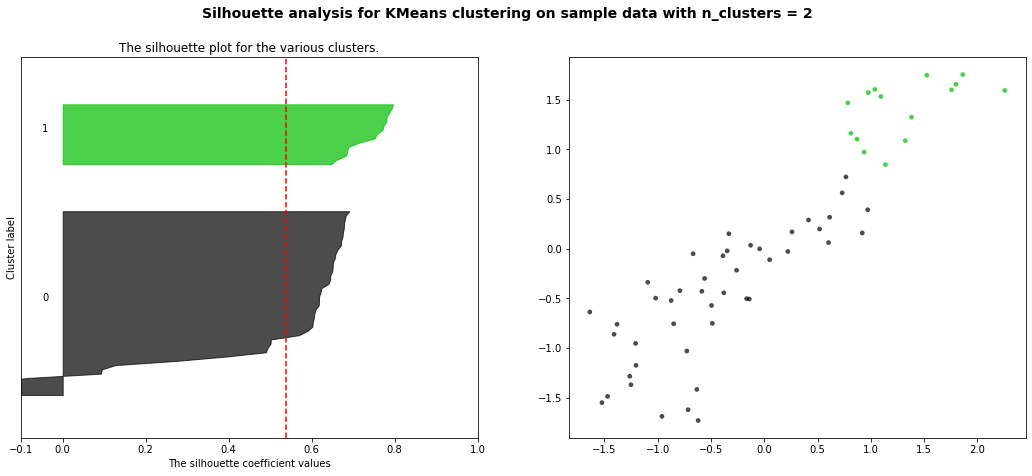

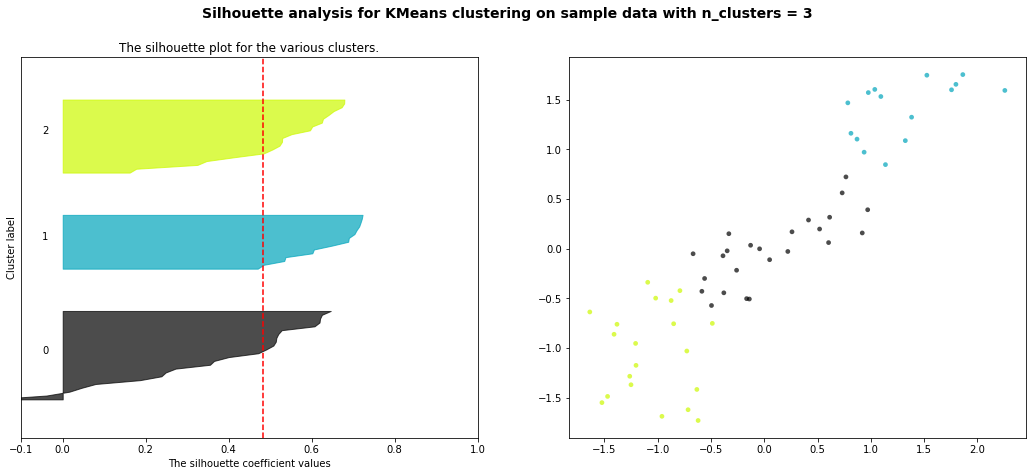

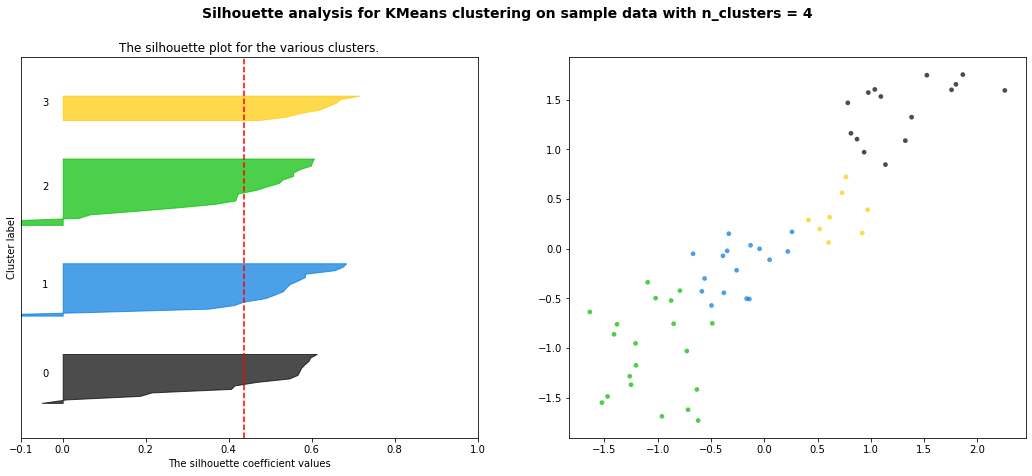

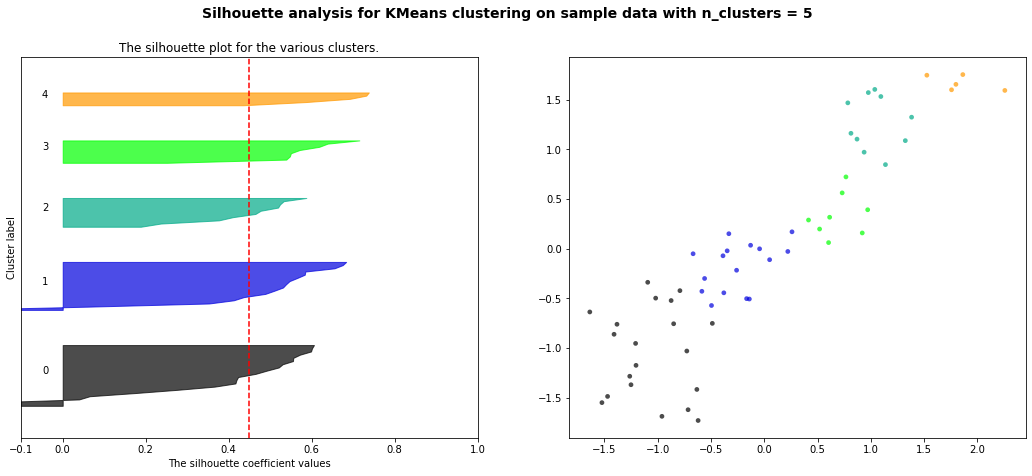

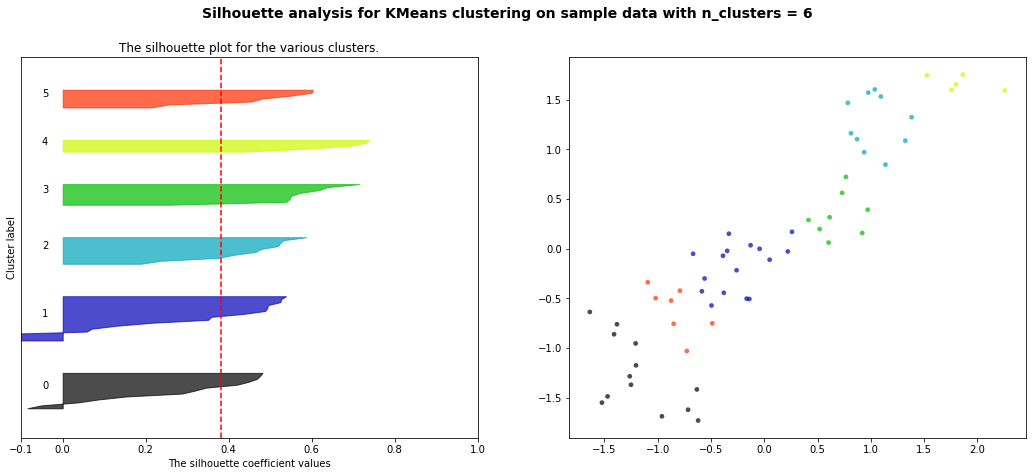

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=90, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

   
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Agglomerative Clustering

***linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’***

Qué criterio de vinculación utilizar. El criterio de vinculación determina qué distancia usar entre conjuntos de observación. El algoritmo fusionará los pares de clústeres que minimizan este criterio.

*   'ward' minimiza la varianza de los grupos que se fusionan.
*   ‘promedio’ usa el promedio de las distancias de cada observación de los dos conjuntos.
*   El enlace 'completo' o 'máximo' utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
*   'único' utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

> **Single**

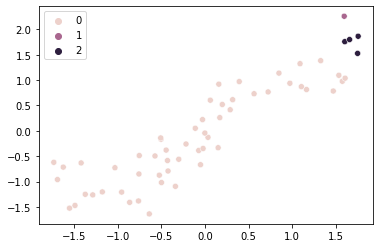

In [112]:
clusteringSingle = AgglomerativeClustering(n_clusters = 3, linkage='single').fit(data)

sns.scatterplot(x= featCO2, y = featTmp, hue=clusteringSingle.labels_)

> **Complete**

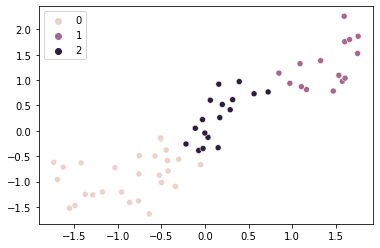

In [113]:
clusteringComplete = AgglomerativeClustering(n_clusters = 3, linkage='complete').fit(data)

sns.scatterplot(x= featCO2, y = featTmp, hue=clusteringComplete.labels_)

> **Ward**

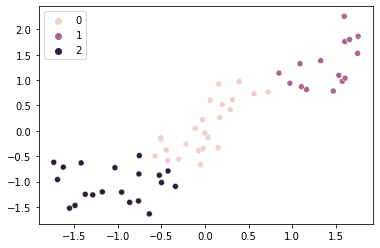

In [114]:
clusteringWard = AgglomerativeClustering(n_clusters = 3, linkage='ward').fit(data)

sns.scatterplot(x= featCO2, y = featTmp, hue=clusteringWard.labels_)

> **Average**

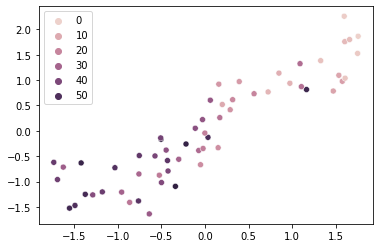

In [115]:
clusteringAvg = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters = None).fit(data)

sns.scatterplot(x= featCO2, y = featTmp, hue=clusteringAvg.labels_)

De los cuatro creterios de vinculación, el que muestra una clusterización más definida es complete, aunque no la esperada.

> **Hierarchical Clustering Dendrogram**

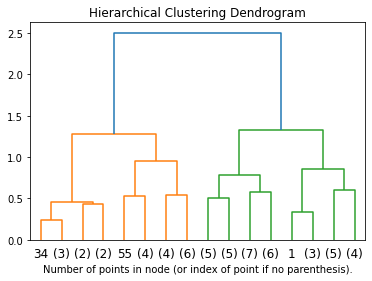

In [116]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model = model.fit(data)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### DBSCAN

**Nota previa:** Conociendo nuestra distribución de los datos, la cual no muestra a simple vista distintas aglomeraciones de los datos, podemos quizás asumir que este algoritmo no nos será util para poder identificar posibles cluster entre las features seleccionadas.

In [117]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [118]:
print('Samples =',len(data))
print('Target=1:', np.sum(y))
print('Target=0:', len(data)-np.sum(y))

Samples = 59
Target=1: 33
Target=0: 26


> **Aplicamos DBSCAN con los valores default (eps=0.5 y min_samples=5)**

Clusters aproximados: 1
Noise points aproximados: 0
v_measure = 8.090915141046273e-16


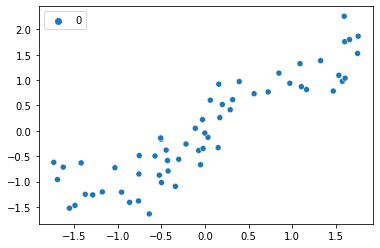

In [119]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(data)

sns.scatterplot(x=featCO2, y=featTmp, hue=dbscan_cluster1.labels_)

labels = dbscan_cluster1.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Clusters aproximados: %d' % N_clus)

n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Noise points aproximados: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

> Con los valores por default no se identifican clusters.

A continuación probamos con bajar el epsilon y mantener el mínimo de muestras a default.

> **Aplicamos DBSCAN con eps=0.4 y min_samples=5**

Clusters aproximados: 2
Noise points aproximados: 9
v_measure = 0.05836002674176218


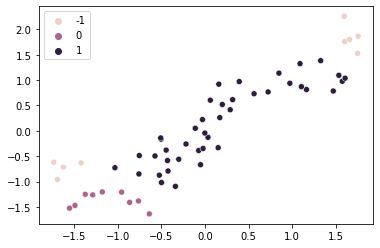

In [120]:
dbscan_cluster2 = DBSCAN(eps=0.4)
dbscan_cluster2.fit(data)

sns.scatterplot(x=featCO2, y=featTmp, hue=dbscan_cluster2.labels_)

labels = dbscan_cluster2.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Clusters aproximados: %d' % N_clus)

n_noise = list(dbscan_cluster2.labels_).count(-1)
print('Noise points aproximados: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Ahora necesitamos encontrar el valor optimo de eps. Para ello, realizamos nuevamente el método del codo. En esta aproximación, la distancia promedio entre cada punto y sus k nearest neighbors se calcula donde k = min_samples seleccionados por nosotros. Luego se trazan las k-distancias promedio en orden ascendente en un gráfico de k-distancia. Finalmente, el valor óptimo de epsilon es el punto máximo de curvatura (**knee bend**).

Text(0, 0.5, 'Distance')

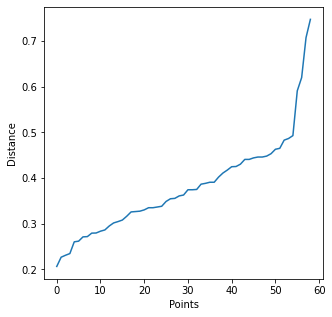

In [121]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5) #usamos el valor default
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,4], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Teniendo en cuenta de que puede ser poco sencillo identificar con exactitud el punto máximo de curvatura, decidimos utilazar otra biblioteca que nos permite identificar con facilidad el mismo.

In [122]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Knee bend: 0.4653411732151137


<Figure size 360x360 with 0 Axes>

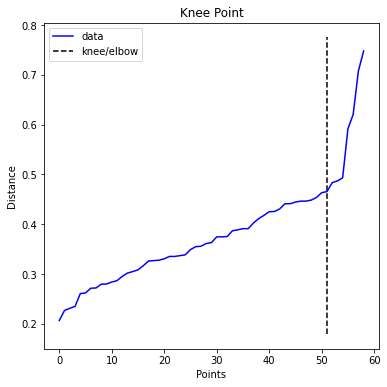

In [123]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
kneebend = distances[knee.knee]

print('Knee bend:', kneebend)

> **Aplicamos DBSCAN con eps=knee bend y min_samples=5,8,12,16**

<ipython-input-124-10ec13795327>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



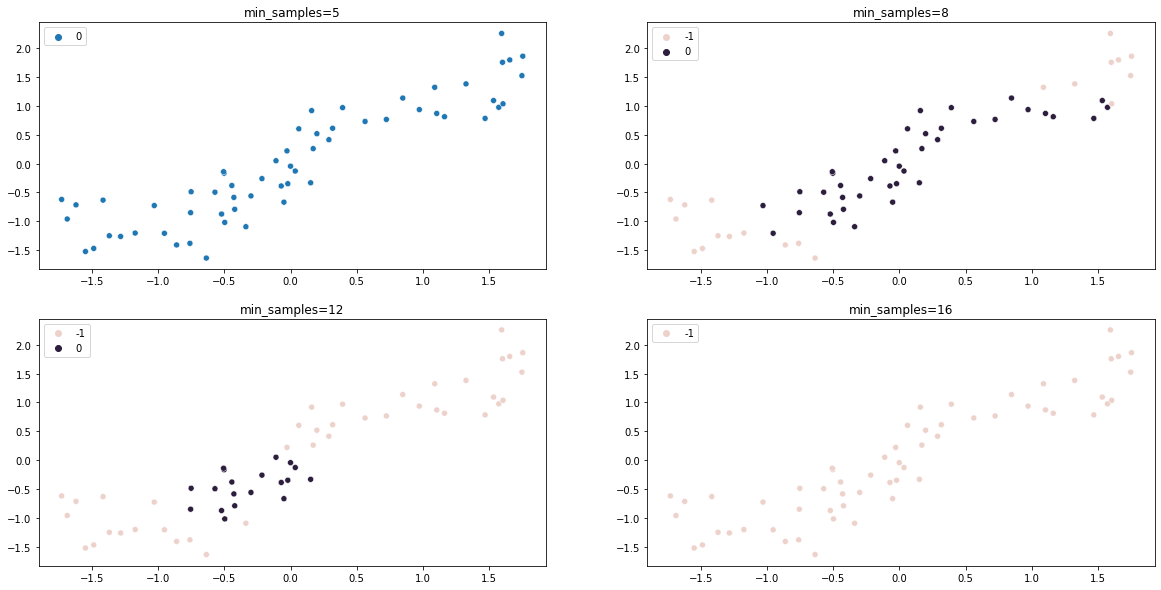

In [124]:
minsamples = np.array([5, 8, 12, 16])
f = plt.figure()
f.set_size_inches(20, 10)
f.add_subplot(2, 2, 1)
i=1
for ms in minsamples:
  db = DBSCAN(eps=kneebend, min_samples=ms).fit(data)
  f.add_subplot(2, 2, i)
  sns.scatterplot(x=featCO2, y=featTmp, hue=db.labels_).set(title="min_samples="+str(ms))
  i+=1
plt.show()

> De todos modos, tal y como habíamos adelantado inicialmente, utilizando este algoritmo, no nos permite identificar posibles clusters.

### Spectral Clustering

Detalles del algoritmo:

*   Parametros: numero de clusters
*   Escalabilidad: Cantidad media de muestras, cantidad baja de clusters
*   Caso de uso: Poca cantidad de clusters, de tamaño similar.

Consideramos entonces seleccionar este algoritmo dado que tenemos una cantidad relativamente baja de muestras (59), y esperamos encontrar solo dos clusters.

In [125]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

### affinity = ‘rbf’

In [126]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

labels_rbf = spectral_model_rbf.fit_predict(data)

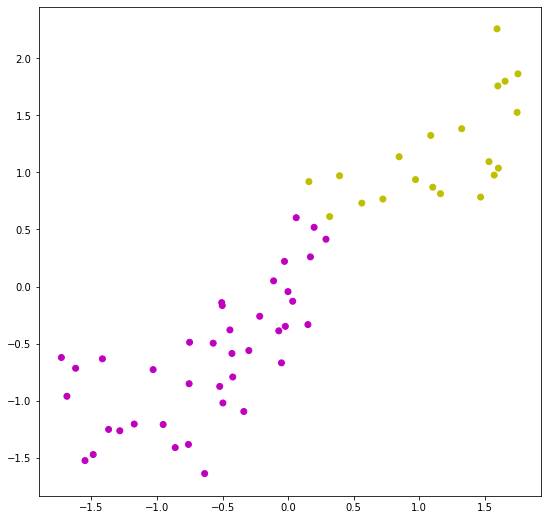

In [127]:
colours = {}
colours[0] = 'm'
colours[1] = 'y'
cvec = [colours[label] for label in labels_rbf]

plt.figure(figsize =(9, 9))
plt.scatter(featCO2, featTmp, c = cvec)
plt.show()

### affinity = ‘nearest_neighbors’

In [128]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
labels_nn = spectral_model_nn.fit_predict(data)

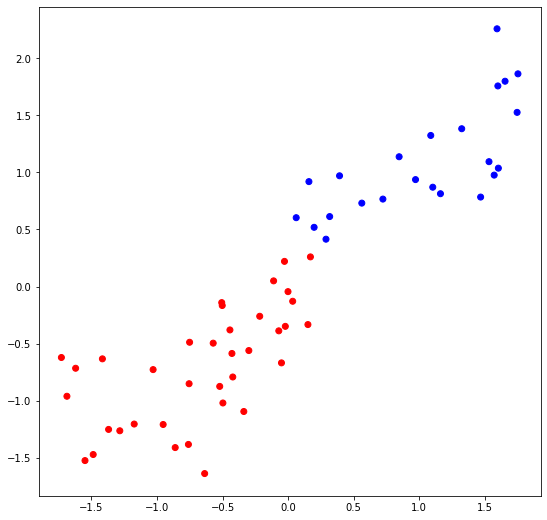

In [129]:
colours2 = {}
colours2[0] = 'b'
colours2[1] = 'r'
cvec2 = [colours2[label] for label in labels_nn]

plt.figure(figsize =(9, 9))
plt.scatter(featCO2, featTmp, c = cvec2)
plt.show()

### Evaluamos la performance de ambos modelos

In [130]:
affinity = ['rbf', 'nearest-neighbours']
  
s_scores = []
  
s_scores.append(silhouette_score(data, labels_rbf))
s_scores.append(silhouette_score(data, labels_nn))
  
print(s_scores)

[0.5773464302403897, 0.5902498486740041]


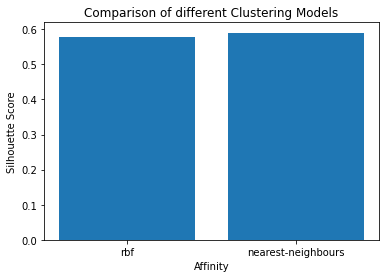

In [131]:
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

> Claramente la diferencia es insignificante

#### **Conclusión**

Habiendo aplicado los algoritmos en sus diferentes configuraciones y parametros, podemos concluir que entre las features seleccioneadas (TmpChg y COEmission) no hemos podido encontrar subconjuntos o clusters que nos indiquen algún comportamiento distintivo entre ellos. Tampoco, además, hemos podido comprobar la hipotesis.
Por esto último, creemos que nos hace falta más features o variables para poder justificar, mediante el uso de modelos de Machine Learning la creciente de temperaturas de estos últimos 50 años.